# 目的
- SEDデータの扱い確認
- 簡単に分析チェック

# データ読み込み

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', 150)

In [ ]:
kyi_2021 = pd.read_csv('/content/drive/MyDrive/競馬/csv/KYI/KYI2021.csv')
sed_2021 = pd.read_csv('/content/drive/MyDrive/競馬/csv/SED/SED2021.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (3,111) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
sed_2021.head(5)

,レースキー_場コード,レースキー_年,レースキー_回,レースキー_日,レースキー_R,馬番,競争成績キー_血統登録番号,競争成績キー_年月日,馬名,レース条件_距離,レース条件_トラック情報_芝ダ障害コード,レース場条件_トラック情報_右左,レース場条件_トラック情報_内外,レース場条件_馬場状態,レース場条件_種別,レース場条件_条件,レース場条件_記号,レース場条件_重量,レース場条件_グレード,レース場条件_レース名,レース場条件_頭数,レース場条件_レース名略称,馬成績_着順,馬成績_以上区分,馬成績_タイム,馬成績_斤量,馬成績_騎手名,馬成績_調教師名,馬成績_確定単勝オッズ,馬成績_確定単勝人気順位,JRDBデータ_IDM,JRDBデータ_素点,JRDBデータ_馬場差,JRDBデータ_ペース,JRDBデータ_出遅,JRDBデータ_位置取,JRDBデータ_不利,JRDBデータ_前不利,JRDBデータ_中不利,JRDBデータ_後不利,JRDBデータ_レース,JRDBデータ_コース取り,JRDBデータ_上昇度コード,JRDBデータ_クラスコード,JRDBデータ_馬体コード,JRDBデータ_気配コード,JRDBデータ_レースペース,JRDBデータ_馬ペース,JRDBデータ_テン指数,JRDBデータ_上がり指数,JRDBデータ_ペース指数,JRDBデータ_レースP指数,JRDBデータ_1(2)着馬名,JRDBデータ_1(2)着タイム差,JRDBデータ_前3Fタイム,JRDBデータ_後3Fタイム,JRDBデータ_備考,予備1,確定複勝オッズ下,10時単勝オッズ,10時複勝オッズ,コーナー順位1,コーナー順位2,コーナー順位3,コーナー順位4,前3F先頭差,後3F先頭差,騎手コード,調教師コード,馬体重,馬体重増減,天候コード,コース,コース脚質,払戻データ_単勝,払戻データ_複勝,本賞金,収得賞金,レースペース乱れ,馬ペース乱れ,４角コース取り,予備2
0,6,21,1,8,1,1,18106062,20210124,ニシノサラマ,1200,2,1,1,42,12,A3,0,3,NaN,NaN,16,NaN,14,0,1148,530,原優介,小桧山悟,136.8,12,10.0,9.0,-14.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,3.0,38.0,3.0,2.0,M,S,-29.3,-20.0,-21.0,0.0,アイスマン,26.0,363.0,385.0,NaN,NaN,19.3,76.6,12.4,0.0,16.0,14.0,15.0,-21.0,-21.0,10604,10312,440,- 2,4,NaN,4.0,NaN,NaN,0.0,0,33.0,33.0,1.0,\n
1,6,21,1,8,1,2,18104143,20210124,トウショウピボット,1200,2,1,1,42,12,A3,0,3,NaN,NaN,16,NaN,16,0,1159,560,岩部純二,杉浦宏昭,187.3,13,3.0,1.0,-14.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,3.0,38.0,2.0,3.0,M,S,-30.3,-25.0,-22.0,0.0,アイスマン,37.0,367.0,392.0,NaN,NaN,25.0,101.5,28.2,0.0,15.0,16.0,16.0,-25.0,-25.0,10412,10314,428,- 4,4,NaN,4.0,NaN,NaN,0.0,0,33.0,33.0,2.0,\n
2,6,21,1,8,1,3,18100556,20210124,キタノフェスタ,1200,2,1,1,42,12,A3,0,3,NaN,NaN,16,NaN,15,0,1149,540,宮崎北斗,天間昭一,287.0,16,11.0,11.0,-14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,38.0,3.0,3.0,M,S,-24.3,-23.0,-16.0,0.0,アイスマン,27.0,359.0,390.0,NaN,NaN,80.4,128.2,36.6,0.0,12.0,11.0,12.0,-17.0,-17.0,10538,10400,392,0,4,NaN,4.0,NaN,NaN,0.0,0,33.0,33.0,2.0,\n
3,6,21,1,8,1,4,18106077,20210124,イルクオーレ,1200,2,1,1,42,12,A3,0,3,NaN,NaN,16,NaN,4,0,1127,560,石橋脩,高橋文雅,10.2,4,33.0,33.0,-14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,38.0,2.0,2.0,M,S,-19.3,-6.0,-11.0,0.0,アイスマン,5.0,354.0,373.0,NaN,NaN,2.7,9.6,2.7,0.0,8.0,9.0,9.0,-12.0,-12.0,10497,10443,508,+14,4,NaN,3.0,NaN,NaN,77.0,0,33.0,33.0,2.0,\n
4,6,21,1,8,1,5,18106874,20210124,ラッキーベルン,1200,2,1,1,42,12,A3,0,3,NaN,NaN,16,NaN,13,0,1145,540,池添謙一,加藤和宏,29.5,8,15.0,15.0,-14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,3.0,38.0,2.0,2.0,M,S,-24.3,-19.0,-16.0,0.0,アイスマン,23.0,359.0,386.0,NaN,NaN,5.0,24.9,4.8,0.0,8.0,11.0,12.0,-17.0,-17.0,10455,10387,434,+ 2,4,NaN,4.0,NaN,NaN,0.0,0,33.0,33.0,1.0,\n


# データを加工する
方針は以下
- NSP算出
- 過去NSP抽出
- ダミー変数化
- 標準化

## NSPについて
- ほとんどTSP
- 総合、前3F、後3Fでそれぞれ算出する

## 基準タイムの算出
基準タイムは以下の3つを求める。
- 総合
- 前3F
- 後3F
斤量は考慮しない

In [ ]:
nsp_target_columns = ['馬成績_タイム', 'JRDBデータ_前3Fタイム', 'JRDBデータ_後3Fタイム', 'レース条件_距離', 'レース場条件_条件', '馬成績_着順', 'レースキー_場コード', 'レース場条件_馬場状態', 'レース条件_トラック情報_芝ダ障害コード']

# データ取得
start = 2014
end = 2020
def get_data_fornsp(start,end):
  for n in range(start, end+1):
    if n == start:
      sed_union =  pd.read_csv('/content/drive/MyDrive/競馬/csv/SED/SED' + str(n) + '.csv')
      sed_union = sed_union[nsp_target_columns]
    else:
      sed_now = pd.read_csv('/content/drive/MyDrive/競馬/csv/SED/SED' + str(n) + '.csv')
      sed_now = sed_now[nsp_target_columns]
      sed_union = pd.concat([sed_union, sed_now])
  return sed_union
sed_union = get_data_fornsp(start, end)
sed_union

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DtypeWarning: Columns (3,46,47) have mixed types.Specify dtype option on import or set low_memory=False.
  app.launch_new_instance()


,馬成績_タイム,JRDBデータ_前3Fタイム,JRDBデータ_後3Fタイム,レース条件_距離,レース場条件_条件,馬成績_着順,レースキー_場コード,レース場条件_馬場状態,レース条件_トラック情報_芝ダ障害コード
0,1148.0,371.0,378.0,1200,A3,9,6,11,2
1,1178.0,377.0,401.0,1200,A3,15,6,11,2
2,1160.0,366.0,395.0,1200,A3,14,6,11,2
3,1147.0,353.0,394.0,1200,A3,6,6,11,2
4,1146.0,361.0,385.0,1200,A3,5,6,11,2
...,...,...,...,...,...,...,...,...,...
48277,1256.0,366.0,370.0,1400,10,11,9,10,2
48278,1260.0,359.0,380.0,1400,10,13,9,10,2
48279,1257.0,363.0,373.0,1400,10,12,9,10,2
48280,1251.0,358.0,372.0,1400,10,4,9,10,2


In [ ]:
sed_union = sed_union.dropna(how='any')

In [ ]:
from numpy import NaN
def get_time(time_txt):
  if time_txt is None or time_txt == 0 or time_txt == float('nan'):
    return None
  return int(time_txt/1000) * 600 + time_txt % 1000
sed_union['馬成績_タイム'] = sed_union['馬成績_タイム'].map(get_time)
sed_union['JRDBデータ_前3Fタイム'] = sed_union['JRDBデータ_前3Fタイム'].map(get_time)
sed_union['JRDBデータ_後3Fタイム'] = sed_union['JRDBデータ_後3Fタイム'].map(get_time)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

In [ ]:
sed_union = sed_union[(sed_union['レース場条件_条件']=='05') | (sed_union['レース場条件_条件']=='10')]
sed_union = sed_union[(sed_union['馬成績_着順']==1) | (sed_union['馬成績_着順']==2) | (sed_union['馬成績_着順']==3)]
sed_union = sed_union.drop('レース場条件_条件', axis=1)
sed_union

,馬成績_タイム,JRDBデータ_前3Fタイム,JRDBデータ_後3Fタイム,レース条件_距離,馬成績_着順,レースキー_場コード,レース場条件_馬場状態,レース条件_トラック情報_芝ダ障害コード
82,723.0,355.0,368.0,1200,2,6,11,2
86,720.0,351.0,369.0,1200,1,6,11,2
92,723.0,350.0,373.0,1200,3,6,11,2
99,1158.0,390.0,381.0,1800,3,6,11,2
103,1156.0,387.0,381.0,1800,2,6,11,2
...,...,...,...,...,...,...,...,...
48231,1136.0,378.0,379.0,1800,1,9,10,2
48236,1141.0,401.0,370.0,1800,2,9,10,2
48270,848.0,353.0,373.0,1400,3,9,10,2
48273,845.0,356.0,368.0,1400,1,9,10,2


In [ ]:
groups = ['レース条件_距離', 'レースキー_場コード', 'レース場条件_馬場状態', 'レース条件_トラック情報_芝ダ障害コード']
sed_union = sed_union.groupby(groups).mean()

In [ ]:
sed_union.to_csv('/content/drive/MyDrive/競馬/nakao_work/nbt.csv')

In [ ]:
print(sed_union.columns)

Index(['馬成績_タイム', 'JRDBデータ_前3Fタイム', 'JRDBデータ_後3Fタイム', '馬成績_着順'], dtype='object')


# nsp計算

In [ ]:
nbt = pd.read_csv('/content/drive/MyDrive/競馬/nakao_work/nbt.csv')

In [ ]:
target_columns = ['レースキー_場コード','レースキー_R','馬番','競争成績キー_血統登録番号','競争成績キー_年月日','馬名','レース条件_距離','レース条件_トラック情報_芝ダ障害コード',
              'レース場条件_トラック情報_右左','レース場条件_トラック情報_内外','レース場条件_馬場状態','レース場条件_種別','レース場条件_条件','レース場条件_重量',
              'レース場条件_頭数','馬成績_着順','馬成績_タイム','馬成績_斤量','JRDBデータ_前3Fタイム','JRDBデータ_後3Fタイム','10時単勝オッズ','10時複勝オッズ','騎手コード','調教師コード','馬体重','天候コード']

# データ取得
start = 2014
end = 2021
def get_data_fornsp(start,end):
  for n in range(start, end+1):
    if n == start:
      sed_union =  pd.read_csv('/content/drive/MyDrive/競馬/csv/SED/SED' + str(n) + '.csv')
      sed_union = sed_union[target_columns]
    else:
      sed_now = pd.read_csv('/content/drive/MyDrive/競馬/csv/SED/SED' + str(n) + '.csv')
      sed_now = sed_now[target_columns]
      sed_union = pd.concat([sed_union, sed_now])
  return sed_union
sed_union = get_data_fornsp(start, end)
sed_union

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DtypeWarning: Columns (3,46,47) have mixed types.Specify dtype option on import or set low_memory=False.


,レースキー_場コード,レースキー_R,馬番,競争成績キー_血統登録番号,競争成績キー_年月日,馬名,レース条件_距離,レース条件_トラック情報_芝ダ障害コード,レース場条件_トラック情報_右左,レース場条件_トラック情報_内外,レース場条件_馬場状態,レース場条件_種別,レース場条件_条件,レース場条件_重量,レース場条件_頭数,馬成績_着順,馬成績_タイム,馬成績_斤量,JRDBデータ_前3Fタイム,JRDBデータ_後3Fタイム,10時単勝オッズ,10時複勝オッズ,騎手コード,調教師コード,馬体重,天候コード
0,6,1,1,11106151,20140118,サンバデジャネイロ,1200,2,1,1,11,12,A3,3,16,9,1148.0,510,371.0,378.0,103.4,17.5,10557,10208,448.0,1
1,6,1,2,11109020,20140118,カシノワンダラー,1200,2,1,1,11,12,A3,3,16,15,1178.0,560,377.0,401.0,79.5,17.7,10465,10238,464.0,1
2,6,1,3,11105383,20140118,リネンウッド,1200,2,1,1,11,12,A3,3,16,14,1160.0,560,366.0,395.0,127.3,12.5,30442,10305,436.0,1
3,6,1,4,11106063,20140118,ヤマタケカントウ,1200,2,1,1,11,12,A3,3,16,6,1147.0,560,353.0,394.0,37.5,4.3,10412,10331,466.0,1
4,6,1,5,11105192,20140118,マイネルスコープ,1200,2,1,1,11,12,A3,3,16,5,1146.0,560,361.0,385.0,18.4,3.0,10429,10399,460.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47816,9,12,12,16102081,20211219,オルクリスト,1400,2,1,1,20,13,16,1,16,5,1234.0,540,354.0,363.0,19.9,4.5,70176,10314,492.0,1
47817,9,12,13,13105495,20211219,デピュティプライム,1400,2,1,1,20,13,16,1,16,10,1242.0,540,355.0,366.0,82.2,16.7,10455,10378,484.0,1
47818,9,12,14,16104760,20211219,シハーブ,1400,2,1,1,20,13,16,1,16,2,1229.0,550,350.0,364.0,3.4,1.7,70234,10256,554.0,1
47819,9,12,15,18103362,20211219,シゲルホサヤク,1400,2,1,1,20,13,16,1,16,1,1225.0,550,343.0,368.0,5.4,1.8,10550,10349,472.0,1


# データチェック&NSPの結合

In [ ]:
sed_union.isnull().sum()

レースキー_場コード                  0
レースキー_R                     0
馬番                          0
競争成績キー_血統登録番号               0
競争成績キー_年月日                  0
馬名                          0
レース条件_距離                    0
レース条件_トラック情報_芝ダ障害コード        0
レース場条件_トラック情報_右左            0
レース場条件_トラック情報_内外            0
レース場条件_馬場状態                 0
レース場条件_種別                   0
レース場条件_条件                   0
レース場条件_重量                   0
レース場条件_頭数                   0
馬成績_着順                      0
馬成績_タイム                    15
馬成績_斤量                      0
JRDBデータ_前3Fタイム          15402
JRDBデータ_後3Fタイム          15042
10時単勝オッズ                 1749
10時複勝オッズ                 1749
騎手コード                       0
調教師コード                      0
馬体重                         5
天候コード                       0
dtype: int64

In [ ]:
from numpy import NaN
sed_union = sed_union.dropna(how='any')
sed_union.shape

(375888, 26)

In [ ]:
def get_time(time_txt):
  if time_txt is None or time_txt == 0 or time_txt == float('nan'):
    return None
  return int(time_txt/1000) * 600 + time_txt % 1000
sed_union['馬成績_タイム'] = sed_union['馬成績_タイム'].map(get_time)
sed_union['JRDBデータ_前3Fタイム'] = sed_union['JRDBデータ_前3Fタイム'].map(get_time)
sed_union['JRDBデータ_後3Fタイム'] = sed_union['JRDBデータ_後3Fタイム'].map(get_time)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [ ]:
sed_union.shape

(375888, 26)

In [ ]:
nbt

,レース条件_距離,レースキー_場コード,レース場条件_馬場状態,レース条件_トラック情報_芝ダ障害コード,馬成績_タイム,JRDBデータ_前3Fタイム,JRDBデータ_後3Fタイム,馬成績_着順
0,1000,1,10,2,589.222222,347.222222,355.944444,2.0
1,1000,1,11,2,589.260870,349.797101,353.942029,2.0
2,1000,1,20,2,588.111111,349.833333,352.472222,2.0
3,1000,1,21,2,585.000000,349.833333,350.000000,2.0
4,1000,1,30,2,584.916667,348.500000,350.250000,2.0
...,...,...,...,...,...,...,...,...
683,2600,10,21,1,1598.750000,375.416667,361.583333,2.0
684,2600,10,22,1,1646.833333,382.166667,383.166667,2.0
685,2600,10,30,1,1643.555556,379.222222,371.000000,2.0
686,2600,10,31,1,1625.666667,388.666667,362.333333,2.0


In [ ]:
sed_union_nbt = pd.merge(sed_union, nbt, on=['レース条件_距離', 'レースキー_場コード', 'レース場条件_馬場状態','レース条件_トラック情報_芝ダ障害コード'], how='left',suffixes=['_uma', '_nbt'])

In [ ]:
sed_union_nbt.isnull().sum()

レースキー_場コード                 0
レースキー_R                    0
馬番                         0
競争成績キー_血統登録番号              0
競争成績キー_年月日                 0
馬名                         0
レース条件_距離                   0
レース条件_トラック情報_芝ダ障害コード       0
レース場条件_トラック情報_右左           0
レース場条件_トラック情報_内外           0
レース場条件_馬場状態                0
レース場条件_種別                  0
レース場条件_条件                  0
レース場条件_重量                  0
レース場条件_頭数                  0
馬成績_着順_uma                 0
馬成績_タイム_uma                0
馬成績_斤量                     0
JRDBデータ_前3Fタイム_uma         0
JRDBデータ_後3Fタイム_uma         0
10時単勝オッズ                   0
10時複勝オッズ                   0
騎手コード                      0
調教師コード                     0
馬体重                        0
天候コード                      0
馬成績_タイム_nbt             4296
JRDBデータ_前3Fタイム_nbt      4296
JRDBデータ_後3Fタイム_nbt      4296
馬成績_着順_nbt              4296
dtype: int64

In [ ]:
sed_union_nbt['レース場条件_馬場状態'].value_counts()

11    151832
10    107267
20     42210
30     22345
21     22335
40      9069
42      6665
31      6425
32      4175
22      2601
12       552
41       412
Name: レース場条件_馬場状態, dtype: int64

In [ ]:
sed_union_nbt['馬場係数'] = 0
for index, row in sed_union_nbt.iterrows():
  if row['レース条件_トラック情報_芝ダ障害コード'] == 1:
    if row['レース場条件_馬場状態'] //10 == 1:
      sed_union_nbt['馬場係数'][index] = -7
    if row['レース場条件_馬場状態'] //10 == 2:
      sed_union_nbt['馬場係数'][index] = 15
    if row['レース場条件_馬場状態'] //10 == 3:
      sed_union_nbt['馬場係数'][index] = 35
    if row['レース場条件_馬場状態'] //10 == 4:
      sed_union_nbt['馬場係数'][index] = 77
  if row['レース条件_トラック情報_芝ダ障害コード'] == 2:
    if row['レース場条件_馬場状態'] //10 == 1:
      sed_union_nbt['馬場係数'][index] = 4
    if row['レース場条件_馬場状態'] //10 == 2:
      sed_union_nbt['馬場係数'][index] = 0
    if row['レース場条件_馬場状態'] //10 == 3:
      sed_union_nbt['馬場係数'][index] = -14
    if row['レース場条件_馬場状態'] //10 == 4:
      sed_union_nbt['馬場係数'][index] = -21

sed_union_nbt['馬場係数'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWith

-7     144996
 4     114655
 0      40605
 15     26541
-14     22938
-21     13167
 35     10007
 77      2979
Name: 馬場係数, dtype: int64

In [ ]:
sed_union_nbt['nsp'] = (sed_union_nbt['馬成績_タイム_uma']/sed_union_nbt['馬成績_タイム_nbt'])*2000 + 300 + sed_union_nbt['馬場係数']

In [ ]:
sed_union_nbt['nsp_前3F'] = (sed_union_nbt['JRDBデータ_前3Fタイム_uma']/sed_union_nbt['JRDBデータ_前3Fタイム_nbt'])*2000 + 300 + sed_union_nbt['馬場係数']
sed_union_nbt['nsp_後3F'] = (sed_union_nbt['JRDBデータ_後3Fタイム_uma']/sed_union_nbt['JRDBデータ_後3Fタイム_nbt'])*2000 + 300 + sed_union_nbt['馬場係数']

In [ ]:
sed_union_nbt.to_csv('/content/drive/MyDrive/競馬/nakao_work/nsp_2014_2021')

In [ ]:
sed_union_nbt

,レースキー_場コード,レースキー_R,馬番,競争成績キー_血統登録番号,競争成績キー_年月日,馬名,レース条件_距離,レース条件_トラック情報_芝ダ障害コード,レース場条件_トラック情報_右左,レース場条件_トラック情報_内外,レース場条件_馬場状態,レース場条件_種別,レース場条件_条件,レース場条件_重量,レース場条件_頭数,馬成績_着順_uma,馬成績_タイム_uma,馬成績_斤量,JRDBデータ_前3Fタイム_uma,JRDBデータ_後3Fタイム_uma,10時単勝オッズ,10時複勝オッズ,騎手コード,調教師コード,馬体重,天候コード,馬成績_タイム_nbt,JRDBデータ_前3Fタイム_nbt,JRDBデータ_後3Fタイム_nbt,馬成績_着順_nbt,馬場係数,nsp,nsp_前3F,nsp_後3F
0,6,1,1,11106151,20140118,サンバデジャネイロ,1200,2,1,1,11,12,A3,3,16,9,748.0,510,371.0,378.0,103.4,17.5,10557,10208,448.0,1,715.903333,346.256667,369.686667,2.000000,4,2393.667599,2446.919029,2348.975024
1,6,1,2,11109020,20140118,カシノワンダラー,1200,2,1,1,11,12,A3,3,16,15,778.0,560,377.0,401.0,79.5,17.7,10465,10238,464.0,1,715.903333,346.256667,369.686667,2.000000,4,2477.477797,2481.575402,2473.404721
2,6,1,3,11105383,20140118,リネンウッド,1200,2,1,1,11,12,A3,3,16,14,760.0,560,366.0,395.0,127.3,12.5,30442,10305,436.0,1,715.903333,346.256667,369.686667,2.000000,4,2427.191679,2418.038719,2440.944800
3,6,1,4,11106063,20140118,ヤマタケカントウ,1200,2,1,1,11,12,A3,3,16,6,747.0,560,353.0,394.0,37.5,4.3,10412,10331,466.0,1,715.903333,346.256667,369.686667,2.000000,4,2390.873926,2342.949912,2435.534813
4,6,1,5,11105192,20140118,マイネルスコープ,1200,2,1,1,11,12,A3,3,16,5,746.0,560,361.0,385.0,18.4,3.0,10429,10399,460.0,1,715.903333,346.256667,369.686667,2.000000,4,2388.080253,2389.158409,2386.844932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375883,9,12,12,16102081,20211219,オルクリスト,1400,2,1,1,20,13,16,1,16,5,834.0,540,354.0,363.0,19.9,4.5,70176,10314,492.0,1,847.209945,355.856354,370.751381,2.005525,0,2268.815416,2289.566837,2258.185557
375884,9,12,13,13105495,20211219,デピュティプライム,1400,2,1,1,20,13,16,1,16,10,842.0,540,355.0,366.0,82.2,16.7,10455,10378,484.0,1,847.209945,355.856354,370.751381,2.005525,0,2287.700936,2295.187083,2274.368909
375885,9,12,14,16104760,20211219,シハーブ,1400,2,1,1,20,13,16,1,16,2,829.0,550,350.0,364.0,3.4,1.7,70234,10256,554.0,1,847.209945,355.856354,370.751381,2.005525,0,2257.011966,2267.085856,2263.580008
375886,9,12,15,18103362,20211219,シゲルホサヤク,1400,2,1,1,20,13,16,1,16,1,825.0,550,343.0,368.0,5.4,1.8,10550,10349,472.0,1,847.209945,355.856354,370.751381,2.005525,0,2247.569207,2227.744139,2285.157810


# 前走情報の取得

In [ ]:
sed_union_nbt = sed_union_nbt.sort_values(['競争成績キー_血統登録番号', '競争成績キー_年月日'],ascending=[True, False])

In [ ]:
sed_union_nbt['前走1_nsp'] = 0
sed_union_nbt['前走2_nsp'] = 0
sed_union_nbt['前走3_nsp'] = 0
sed_union_nbt['前走1_nsp_前3f'] = 0
sed_union_nbt['前走2_nsp_前3f'] = 0
sed_union_nbt['前走3_nsp_前3f'] = 0
sed_union_nbt['前走1_nsp_後3f'] = 0
sed_union_nbt['前走2_nsp_後3f'] = 0
sed_union_nbt['前走3_nsp_後3f'] = 0
sed_union_nbt = sed_union_nbt.reset_index()

In [ ]:
for index, row in sed_union_nbt.iterrows():
  if index == 0:
    now_uma = sed_union_nbt['競争成績キー_血統登録番号'][index]
    counter = 0
  else:
    if sed_union_nbt['競争成績キー_血統登録番号'][index] != now_uma:
      now_uma = sed_union_nbt['競争成績キー_血統登録番号'][index]
      counter = 0
    else:
      counter += 1
      if counter >= 1:
        sed_union_nbt['前走1_nsp'][index-1] = sed_union_nbt['nsp'][index]
        sed_union_nbt['前走1_nsp_前3f'][index-1] = sed_union_nbt['nsp_前3F'][index]
        sed_union_nbt['前走1_nsp_後3f'][index-1] = sed_union_nbt['nsp_後3F'][index]
      if counter >= 2:
        sed_union_nbt['前走2_nsp'][index-2] = sed_union_nbt['nsp'][index]
        sed_union_nbt['前走2_nsp_前3f'][index-2] = sed_union_nbt['nsp_前3F'][index]
        sed_union_nbt['前走2_nsp_後3f'][index-2] = sed_union_nbt['nsp_後3F'][index]
      if counter >= 3:
        sed_union_nbt['前走3_nsp'][index-3] = sed_union_nbt['nsp'][index]
        sed_union_nbt['前走3_nsp_前3f'][index-3] = sed_union_nbt['nsp_前3F'][index]
        sed_union_nbt['前走3_nsp_後3f'][index-3] = sed_union_nbt['nsp_後3F'][index]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: Se

In [ ]:
test = sed_union_nbt[['競争成績キー_年月日','馬名','nsp','前走1_nsp','前走2_nsp','前走3_nsp']]

In [ ]:
test

,競争成績キー_年月日,馬名,nsp,前走1_nsp,前走2_nsp,前走3_nsp
0,20140106,トウカイトリック,NaN,0.000000,0.000000,0.000000
1,20140511,シンゲン,2288.539277,2322.000000,0.000000,0.000000
2,20140330,シンゲン,2322.806961,0.000000,0.000000,0.000000
3,20140810,オートドラゴン,2306.437309,2292.000000,2310.000000,2263.000000
4,20140713,オートドラゴン,2292.990453,2310.000000,2263.000000,2323.000000
...,...,...,...,...,...,...
375883,20210918,ブラヴィーノ,NaN,0.000000,0.000000,0.000000
375884,20211219,ワールドコネクター,2280.866732,2320.642349,2333.179053,2341.514725
375885,20211127,ワールドコネクター,2320.642349,2333.179053,2341.514725,0.000000
375886,20211031,ワールドコネクター,2333.179053,2341.514725,0.000000,0.000000


In [ ]:
sed_union_nbt.to_csv('/content/drive/MyDrive/競馬/nakao_work/nsp_zensou_2014_2021')

# 特徴量修正
- NSPのNaNデータは除外する
- 初出走データは除外するする
- 前走が1つしかない場合、2つ目3つ目には前走データを入れる
- 前走が2つしかない場合、3つ目には1つ目と2つ目の平均を入れる
- ダミー変数化項目は以下
```
dummies = ['レースキー_場コード','レース条件_トラック情報_芝ダ障害コード', 'レース場条件_トラック情報_右左', 'レース場条件_トラック情報_内外', 'レース場条件_馬場状態', 'レース場条件_種別', 'レース場条件_条件']
```

In [ ]:
sed_union_nbt= pd.read_csv('/content/drive/MyDrive/競馬/nakao_work/nsp_zensou_2014_2021')

NameError: ignored

In [ ]:
print(len(sed_union_nbt[sed_union_nbt['前走1_nsp']==0]))
print(len(sed_union_nbt[sed_union_nbt['前走2_nsp']==0]))
print(len(sed_union_nbt[sed_union_nbt['前走3_nsp']==0]))
sed_union_nbt['前走1_nsp'].isnull().sum()

In [ ]:
sed_union_nbt['前走1_nsp'] = sed_union_nbt['前走1_nsp'].fillna(0)
sed_union_nbt['前走2_nsp'] = sed_union_nbt['前走2_nsp'].fillna(0)
sed_union_nbt['前走3_nsp'] = sed_union_nbt['前走3_nsp'].fillna(0)
sed_union_nbt['前走1_nsp_前3f'] = sed_union_nbt['前走1_nsp_前3f'].fillna(0)
sed_union_nbt['前走2_nsp_前3f'] = sed_union_nbt['前走2_nsp_前3f'].fillna(0)
sed_union_nbt['前走3_nsp_前3f'] = sed_union_nbt['前走3_nsp_前3f'].fillna(0)
sed_union_nbt['前走1_nsp_後3f'] = sed_union_nbt['前走1_nsp_後3f'].fillna(0)
sed_union_nbt['前走2_nsp_後3f'] = sed_union_nbt['前走2_nsp_後3f'].fillna(0)
sed_union_nbt['前走3_nsp_後3f'] = sed_union_nbt['前走3_nsp_後3f'].fillna(0)

In [ ]:
#sed_union_nbt = sed_union_nbt.dropna(how='any')
for index, row in sed_union_nbt.iterrows():
  if sed_union_nbt['前走1_nsp'][index] != 0:
    if sed_union_nbt['前走2_nsp'][index] == 0:
      sed_union_nbt['前走2_nsp'][index] = sed_union_nbt['前走1_nsp'][index]
      sed_union_nbt['前走3_nsp'][index] = sed_union_nbt['前走1_nsp'][index]
      sed_union_nbt['前走2_nsp_前3f'][index] = sed_union_nbt['前走1_nsp_前3f'][index]
      sed_union_nbt['前走3_nsp_前3f'][index] = sed_union_nbt['前走1_nsp_前3f'][index]
      sed_union_nbt['前走2_nsp_後3f'][index] = sed_union_nbt['前走1_nsp_後3f'][index]
      sed_union_nbt['前走3_nsp_後3f'][index] = sed_union_nbt['前走1_nsp_後3f'][index]
    elif sed_union_nbt['前走3_nsp'][index] == 0:
      sed_union_nbt['前走3_nsp'][index] = (sed_union_nbt['前走1_nsp'][index] + sed_union_nbt['前走2_nsp'][index])/2
      sed_union_nbt['前走3_nsp_前3f'][index] = (sed_union_nbt['前走1_nsp_前3f'][index] + sed_union_nbt['前走2_nsp_前3f'][index])/2
      sed_union_nbt['前走3_nsp_後3f'][index] = (sed_union_nbt['前走1_nsp_後3f'][index] + sed_union_nbt['前走2_nsp_後3f'][index])/2
      


In [ ]:
sed_union_nbt

In [ ]:
print(len(sed_union_nbt[sed_union_nbt['前走1_nsp']==0]))
print(len(sed_union_nbt[sed_union_nbt['前走2_nsp']==0]))
print(len(sed_union_nbt[sed_union_nbt['前走3_nsp']==0]))

In [ ]:
sed_union_nbt_ounull = sed_union_nbt[sed_union_nbt['前走1_nsp'] != 0]

In [ ]:
sed_union_nbt_ounull.shape

In [ ]:
sed_union_nbt_ounull.head(1)

In [ ]:
sed_union_nbt_ounull_getdummies = pd.get_dummies(sed_union_nbt_ounull, columns=['レースキー_場コード','レース条件_トラック情報_芝ダ障害コード', 'レース場条件_トラック情報_右左', 'レース場条件_トラック情報_内外', 'レース場条件_馬場状態', 'レース場条件_種別', 'レース場条件_条件'])

In [ ]:
sed_union_nbt_ounull_getdummies.head(1)

In [ ]:
sed_union_nbt_ounull_getdummies.to_csv('/content/drive/MyDrive/競馬/nakao_work/sed_union_nbt_ounull_getdummies.csv')

# LGBMでの簡単な確認
- 上までのcsvで一通りSEDの加工は終了
- ここでは3着以内、および1着それぞれについての2値分類タスクとしてlgbmを動かす。lgbmの理由は、特徴量重要度の確認が容易だから。
- スコアの算出は目的ではないのでしない。

In [ ]:
import pandas as pd


sed_union_nbt_ounull_getdummies = pd.read_csv('/content/drive/MyDrive/競馬/nakao_work/sed_union_nbt_ounull_getdummies.csv')

In [ ]:
sed_union_nbt_ounull_getdummies['3rank'] = 0
sed_union_nbt_ounull_getdummies['1rank'] = 0
for index, row in sed_union_nbt_ounull_getdummies.iterrows():
  if sed_union_nbt_ounull_getdummies['馬成績_着順_uma'][index] == 1:
    sed_union_nbt_ounull_getdummies['1rank'][index] = 1
  if sed_union_nbt_ounull_getdummies['馬成績_着順_uma'][index] < 4:
    sed_union_nbt_ounull_getdummies['3rank'][index] = 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
train = sed_union_nbt_ounull_getdummies[sed_union_nbt_ounull_getdummies['競争成績キー_年月日']<20210000]
test = sed_union_nbt_ounull_getdummies[sed_union_nbt_ounull_getdummies['競争成績キー_年月日']>20210000]

In [ ]:
l = sed_union_nbt_ounull_getdummies.columns

In [ ]:
print(l)

Index(['Unnamed: 0', 'level_0', 'index', 'レースキー_R', '馬番', '競争成績キー_血統登録番号',
       '競争成績キー_年月日', '馬名', 'レース条件_距離', 'レース場条件_重量', 'レース場条件_頭数', '馬成績_着順_uma',
       '馬成績_タイム_uma', '馬成績_斤量', 'JRDBデータ_前3Fタイム_uma', 'JRDBデータ_後3Fタイム_uma',
       '10時単勝オッズ', '10時複勝オッズ', '騎手コード', '調教師コード', '馬体重', '天候コード',
       '馬成績_タイム_nbt', 'JRDBデータ_前3Fタイム_nbt', 'JRDBデータ_後3Fタイム_nbt', '馬成績_着順_nbt',
       '馬場係数', 'nsp', 'nsp_前3F', 'nsp_後3F', '前走1_nsp', '前走2_nsp', '前走3_nsp',
       '前走1_nsp_前3f', '前走2_nsp_前3f', '前走3_nsp_前3f', '前走1_nsp_後3f',
       '前走2_nsp_後3f', '前走3_nsp_後3f', 'レースキー_場コード_1', 'レースキー_場コード_2',
       'レースキー_場コード_3', 'レースキー_場コード_4', 'レースキー_場コード_5', 'レースキー_場コード_6',
       'レースキー_場コード_7', 'レースキー_場コード_8', 'レースキー_場コード_9', 'レースキー_場コード_10',
       'レース条件_トラック情報_芝ダ障害コード_1', 'レース条件_トラック情報_芝ダ障害コード_2',
       'レース場条件_トラック情報_右左_1', 'レース場条件_トラック情報_右左_2', 'レース場条件_トラック情報_右左_3',
       'レース場条件_トラック情報_内外_1', 'レース場条件_トラック情報_内外_2', 'レース場条件_トラック情報_内外_9',
       'レース場条件_馬場状態_10', 'レース場条件_馬場状態_11', 'レース場条件_馬場状態_12', 'レ

In [ ]:
use_columns = ['馬番', 'レース条件_距離', 'レース場条件_重量', 'レース場条件_頭数', '馬成績_斤量','10時単勝オッズ', '10時複勝オッズ', '馬体重', 
       '前走1_nsp', '前走2_nsp', '前走3_nsp',
       '前走1_nsp_前3f', '前走2_nsp_前3f', '前走3_nsp_前3f',
       '前走1_nsp_後3f','前走2_nsp_後3f', '前走3_nsp_後3f',
       'レースキー_場コード_1', 'レースキー_場コード_2','レースキー_場コード_3', 'レースキー_場コード_4', 'レースキー_場コード_5', 'レースキー_場コード_6','レースキー_場コード_7', 'レースキー_場コード_8', 'レースキー_場コード_9', 'レースキー_場コード_10',
       'レース条件_トラック情報_芝ダ障害コード_1', 'レース条件_トラック情報_芝ダ障害コード_2',
       'レース場条件_トラック情報_右左_1', 'レース場条件_トラック情報_右左_2', 'レース場条件_トラック情報_右左_3',
       'レース場条件_トラック情報_内外_1', 'レース場条件_トラック情報_内外_2', 'レース場条件_トラック情報_内外_9',
       'レース場条件_馬場状態_10', 'レース場条件_馬場状態_11', 'レース場条件_馬場状態_12', 'レース場条件_馬場状態_20','レース場条件_馬場状態_21', 'レース場条件_馬場状態_22', 'レース場条件_馬場状態_30', 'レース場条件_馬場状態_31','レース場条件_馬場状態_32', 'レース場条件_馬場状態_40', 'レース場条件_馬場状態_41', 'レース場条件_馬場状態_42',
       'レース場条件_種別_11', 'レース場条件_種別_12', 'レース場条件_種別_13', 'レース場条件_種別_14',
       'レース場条件_条件_05', 'レース場条件_条件_10', 'レース場条件_条件_16', 'レース場条件_条件_A3','レース場条件_条件_OP']

In [ ]:
target_columns_case = ['3rank', '1rank']
target_columns_rank = ['馬成績_着順_uma']

In [ ]:
len(use_columns)

57

3着以内

In [ ]:
#from sklearn import dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import lightgbm as lgb

seed = 0
X_train = train[use_columns].values
y_train = train['3rank'].values

X_test = test[use_columns].values
y_test = test['3rank'].values


sc = StandardScaler() 
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)


lgb_train = lgb.Dataset(X_train, y_train)

# 面倒なのでtestデータをvalidとして使っちゃう
lgb_test = lgb.Dataset(X_test, y_test)


params = {
        'boosting_type': 'gbdt',
        'objective': 'binary',
        'metric': 'rmse',   # 評価指標 : 2条誤差
        'num_iterations': 100,
        'learning_rate': 0.1,
}

model_3rank = lgb.train(params,
                  train_set=lgb_train, # トレーニングデータの指定
                  valid_sets=lgb_test, # 検証データの指定(検証時)
                  )

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's rmse: 0.403867
[2]	valid_0's rmse: 0.395981
[3]	valid_0's rmse: 0.389802
[4]	valid_0's rmse: 0.384714
[5]	valid_0's rmse: 0.380875
[6]	valid_0's rmse: 0.377776
[7]	valid_0's rmse: 0.375262
[8]	valid_0's rmse: 0.373287
[9]	valid_0's rmse: 0.371802
[10]	valid_0's rmse: 0.370679
[11]	valid_0's rmse: 0.369774
[12]	valid_0's rmse: 0.369114
[13]	valid_0's rmse: 0.368614
[14]	valid_0's rmse: 0.368234
[15]	valid_0's rmse: 0.367942
[16]	valid_0's rmse: 0.36778
[17]	valid_0's rmse: 0.367632
[18]	valid_0's rmse: 0.367551
[19]	valid_0's rmse: 0.367487
[20]	valid_0's rmse: 0.367489
[21]	valid_0's rmse: 0.367462
[22]	valid_0's rmse: 0.367474
[23]	valid_0's rmse: 0.367529
[24]	valid_0's rmse: 0.367597
[25]	valid_0's rmse: 0.367646
[26]	valid_0's rmse: 0.367673
[27]	valid_0's rmse: 0.367719
[28]	valid_0's rmse: 0.367774
[29]	valid_0's rmse: 0.367831
[30]	valid_0's rmse: 0.367888
[31]	valid_0's rmse: 0.3679
[32]	valid_0's rmse: 0.367908
[33]	valid_0's rmse: 0.367945
[34]	valid_0's rmse: 0

,feature,importance
6,10時複勝オッズ,411
5,10時単勝オッズ,371
8,前走1_nsp,203
7,馬体重,187
14,前走1_nsp_後3f,183


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12524 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12540 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 22580 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26465 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20214 missing from current font.
  font.set_

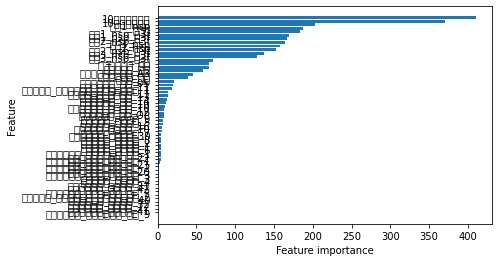

In [ ]:
import IPython
import numpy as np
import matplotlib.pyplot as plt

def display(*dfs, head=True):
    for df in dfs:
        IPython.display.display(df.head() if head else df)
def plot_feature_importance(df): 
    n_features = len(df)                              # 特徴量数(説明変数の個数) 
    df_plot = df.sort_values('importance')            # df_importanceをプロット用に特徴量重要度を昇順ソート 
    f_importance_plot = df_plot['importance'].values  # 特徴量重要度の取得 
    plt.barh(range(n_features), f_importance_plot, align='center') 
    cols_plot = df_plot['feature'].values             # 特徴量の取得 
    plt.yticks(np.arange(n_features), cols_plot)      # x軸,y軸の値の設定
    plt.xlabel('Feature importance')                  # x軸のタイトル
    plt.ylabel('Feature')  

cols = use_columns # 特徴量名のリスト(目的変数target以外)
f_importance = np.array(model_3rank.feature_importance()) # 特徴量重要度の算出
#f_importance = f_importance / np.sum(f_importance) # 正規化(必要ない場合はコメントアウト)
df_importance_3rank = pd.DataFrame({'feature':cols, 'importance':f_importance})
df_importance_3rank = df_importance_3rank.sort_values('importance', ascending=False) # 降順ソート
display(df_importance_3rank)

plot_feature_importance(df_importance_3rank)

In [ ]:
#from sklearn import dataset

seed = 0
X_train = train[use_columns].values
y_train = train['1rank'].values

X_test = test[use_columns].values
y_test = test['1rank'].values


sc = StandardScaler() 
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)


lgb_train = lgb.Dataset(X_train, y_train)

# 面倒なのでtestデータをvalidとして使っちゃう
lgb_test = lgb.Dataset(X_test, y_test)


params = {
        'boosting_type': 'gbdt',
        'objective': 'binary',
        'metric': 'rmse',   # 評価指標 : 2条誤差
        'num_iterations': 100,
        'learning_rate': 0.1,
}

model_1rank = lgb.train(params,
                  train_set=lgb_train, # トレーニングデータの指定
                  valid_sets=lgb_test, # 検証データの指定(検証時)
                  )

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's rmse: 0.25499
[2]	valid_0's rmse: 0.25174
[3]	valid_0's rmse: 0.249427
[4]	valid_0's rmse: 0.247732
[5]	valid_0's rmse: 0.246599
[6]	valid_0's rmse: 0.245765
[7]	valid_0's rmse: 0.245199
[8]	valid_0's rmse: 0.244851
[9]	valid_0's rmse: 0.244612
[10]	valid_0's rmse: 0.244517
[11]	valid_0's rmse: 0.24452
[12]	valid_0's rmse: 0.244563
[13]	valid_0's rmse: 0.244636
[14]	valid_0's rmse: 0.244778
[15]	valid_0's rmse: 0.244872
[16]	valid_0's rmse: 0.245019
[17]	valid_0's rmse: 0.245173
[18]	valid_0's rmse: 0.245276
[19]	valid_0's rmse: 0.245422
[20]	valid_0's rmse: 0.245532
[21]	valid_0's rmse: 0.24565
[22]	valid_0's rmse: 0.245751
[23]	valid_0's rmse: 0.245855
[24]	valid_0's rmse: 0.245931
[25]	valid_0's rmse: 0.245996
[26]	valid_0's rmse: 0.246056
[27]	valid_0's rmse: 0.246136
[28]	valid_0's rmse: 0.246188
[29]	valid_0's rmse: 0.246261
[30]	valid_0's rmse: 0.246351
[31]	valid_0's rmse: 0.246412
[32]	valid_0's rmse: 0.24643
[33]	valid_0's rmse: 0.246469
[34]	valid_0's rmse: 0.2

,feature,importance
5,10時単勝オッズ,339
6,10時複勝オッズ,276
7,馬体重,231
14,前走1_nsp_後3f,224
11,前走1_nsp_前3f,196


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12524 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12540 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 22580 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26465 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20214 missing from current font.
  font.set_

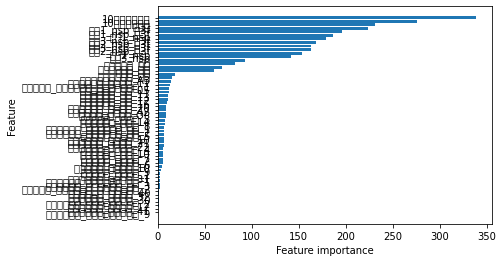

In [ ]:
cols = use_columns # 特徴量名のリスト(目的変数target以外)
f_importance = np.array(model_1rank.feature_importance()) # 特徴量重要度の算出
#f_importance = f_importance / np.sum(f_importance) # 正規化(必要ない場合はコメントアウト)
df_importance_1rank = pd.DataFrame({'feature':cols, 'importance':f_importance})
df_importance_1rank = df_importance_1rank.sort_values('importance', ascending=False) # 降順ソート
display(df_importance_1rank)

plot_feature_importance(df_importance_1rank)

In [ ]:
print('1位予想の特徴量重要度')
print(df_importance_1rank)
print('3位以内の特徴量重要度')
print(df_importance_3rank)

1位予想の特徴量重要度
                   feature  importance
5                 10時単勝オッズ         339
6                 10時複勝オッズ         276
7                      馬体重         231
14             前走1_nsp_後3f         224
11             前走1_nsp_前3f         196
8                  前走1_nsp         187
13             前走3_nsp_前3f         179
12             前走2_nsp_前3f         168
16             前走3_nsp_後3f         163
15             前走2_nsp_後3f         163
9                  前走2_nsp         154
10                 前走3_nsp         142
0                       馬番          93
1                 レース条件_距離          82
3                レース場条件_頭数          69
4                   馬成績_斤量          60
2                レース場条件_重量          19
54            レース場条件_条件_A3          15
36          レース場条件_馬場状態_11          14
27  レース条件_トラック情報_芝ダ障害コード_1          13
51            レース場条件_条件_05          12
47            レース場条件_種別_11          12
49            レース場条件_種別_13          11
48            レース場条件_種別_12          11
53           

# 精度算出

In [ ]:
import pandas as pd
sed_union_nbt_ounull_getdummies = pd.read_csv('/content/drive/MyDrive/競馬/nakao_work/sed_union_nbt_ounull_getdummies.csv')


odds_columns = ['競争成績キー_血統登録番号','競争成績キー_年月日', '馬成績_確定単勝オッズ', '確定複勝オッズ下']

# データ取得
start = 2014
end = 2021
def get_data_fornsp(start,end):
  for n in range(start, end+1):
    if n == start:
      sed_union =  pd.read_csv('/content/drive/MyDrive/競馬/csv/SED/SED' + str(n) + '.csv')
      sed_union = sed_union[odds_columns]
    else:
      sed_now = pd.read_csv('/content/drive/MyDrive/競馬/csv/SED/SED' + str(n) + '.csv')
      sed_now = sed_now[odds_columns]
      sed_union = pd.concat([sed_union, sed_now])
  return sed_union
sed_odds = get_data_fornsp(start, end)
sed_odds

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: DtypeWarning: Columns (3,46,47) have mixed types.Specify dtype option on import or set low_memory=False.


,競争成績キー_血統登録番号,競争成績キー_年月日,馬成績_確定単勝オッズ,確定複勝オッズ下
0,11106151,20140118,249.0,35.0
1,11109020,20140118,164.6,29.2
2,11105383,20140118,231.8,30.2
3,11106063,20140118,31.6,2.2
4,11105192,20140118,19.4,3.2
...,...,...,...,...
47816,16102081,20211219,22.8,3.6
47817,13105495,20211219,189.1,19.1
47818,16104760,20211219,2.8,1.4
47819,18103362,20211219,3.2,1.3


In [ ]:
sed_union_nbt_ounull_getdummies.shape

(328240, 81)

In [ ]:
sed_union_nbt_ounull_getdummies_odds = pd.merge(sed_union_nbt_ounull_getdummies, sed_odds, on=['競争成績キー_血統登録番号','競争成績キー_年月日'], how='left')

In [ ]:
sed_union_nbt_ounull_getdummies_odds['確定複勝オッズ下'].isnull().sum()

0

In [ ]:
sed_union_nbt_ounull_getdummies_odds['3rank'] = 0
sed_union_nbt_ounull_getdummies_odds['1rank'] = 0
for index, row in sed_union_nbt_ounull_getdummies_odds.iterrows():
  if sed_union_nbt_ounull_getdummies_odds['馬成績_着順_uma'][index] == 1:
    sed_union_nbt_ounull_getdummies_odds['1rank'][index] = 1
  if sed_union_nbt_ounull_getdummies_odds['馬成績_着順_uma'][index] < 4:
    sed_union_nbt_ounull_getdummies_odds['3rank'][index] = 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
train = sed_union_nbt_ounull_getdummies_odds[sed_union_nbt_ounull_getdummies_odds['競争成績キー_年月日']<20210000]
test = sed_union_nbt_ounull_getdummies_odds[sed_union_nbt_ounull_getdummies_odds['競争成績キー_年月日']>20210000]

In [ ]:
use_columns = ['馬番','レース条件_距離', 'レース場条件_重量', 'レース場条件_頭数', '馬成績_斤量','10時単勝オッズ', '10時複勝オッズ', '馬体重', 
       '前走1_nsp', '前走2_nsp', '前走3_nsp',
       '前走1_nsp_前3f', '前走2_nsp_前3f', '前走3_nsp_前3f',
       '前走1_nsp_後3f','前走2_nsp_後3f', '前走3_nsp_後3f',
       'レースキー_場コード_1', 'レースキー_場コード_2','レースキー_場コード_3', 'レースキー_場コード_4', 'レースキー_場コード_5', 'レースキー_場コード_6','レースキー_場コード_7', 'レースキー_場コード_8', 'レースキー_場コード_9', 'レースキー_場コード_10',
       'レース条件_トラック情報_芝ダ障害コード_1', 'レース条件_トラック情報_芝ダ障害コード_2',
       'レース場条件_トラック情報_右左_1', 'レース場条件_トラック情報_右左_2', 'レース場条件_トラック情報_右左_3',
       'レース場条件_トラック情報_内外_1', 'レース場条件_トラック情報_内外_2', 'レース場条件_トラック情報_内外_9',
       'レース場条件_馬場状態_10', 'レース場条件_馬場状態_11', 'レース場条件_馬場状態_12', 'レース場条件_馬場状態_20','レース場条件_馬場状態_21', 'レース場条件_馬場状態_22', 'レース場条件_馬場状態_30', 'レース場条件_馬場状態_31','レース場条件_馬場状態_32', 'レース場条件_馬場状態_40', 'レース場条件_馬場状態_41', 'レース場条件_馬場状態_42',
       'レース場条件_種別_11', 'レース場条件_種別_12', 'レース場条件_種別_13', 'レース場条件_種別_14',
       'レース場条件_条件_05', 'レース場条件_条件_10', 'レース場条件_条件_16', 'レース場条件_条件_A3','レース場条件_条件_OP']

In [ ]:
target_columns_case = ['3rank', '1rank']
target_columns_rank = ['馬成績_着順_uma']

## 複勝
- k = 5 のCross Validation
- 最終的には平均を取る

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import lightgbm as lgb

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

from sklearn.datasets import make_classification
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

seed = 0
X_train = train[use_columns].values
y_train = train['3rank'].values

X_test = test[use_columns].values
y_test = test['3rank'].values


sc = StandardScaler() 
X_train_np=sc.fit_transform(X_train)
X_test_np=sc.fit_transform(X_test)
X_train = pd.DataFrame(X_train_np)
X_test = pd.DataFrame(X_test_np)

params = {
    "objective": "binary",
    "boosting" : "gbdt",
    "learning_rate": 0.1,
    "metric": "binary_logloss",
    "seed": 42
}

skf = StratifiedKFold(n_splits=5, random_state=12, shuffle=True)

# 学習記録用の入れ物を準備
oof = pd.DataFrame() # Out-of-Fold 結果
models = [] # 各 fold のモデル
scores = 0.0 # Validation データでのスコア


In [ ]:


for fold, (trn_idx, val_idx) in enumerate(skf.split(X_train, y_train)):
    
    print("Fold :", fold+1)
    
    # train/validation 用に lightGBM 用データセットを作成
    X_trn, y_trn = X_train.loc[trn_idx], y_train[trn_idx]
    X_val, y_val = X_train.loc[val_idx], y_train[val_idx]
    
    lgb_train = lgb.Dataset(X_trn, y_trn, weight=None)
    lgb_eval = lgb.Dataset(X_val, y_val, weight=None)
    
    # model の作成、学習
    model = lgb.train(params=params,
                      train_set=lgb_train,
                      valid_sets=[lgb_train, lgb_eval],
                      num_boost_round=10000, # 10000 round まで実行
                      early_stopping_rounds=100, # 100 round ごとに los を確認。改善なければ stop
                      verbose_eval=100 # 100 round ごとの los を表示。
                     )
    
    # validation データでの予測結果
    val_pred = model.predict(X_val)
    score = roc_auc_score(y_true=y_val, y_score=val_pred)
    print(f"Validation ROC-AUC score : {score:.4f}")

    scores += score / 5
    models.append(model)
    print("*" * 100)

# 各 fold における Validation スコアの平均
print(f"All fold average score : {scores:.4f}")

Fold : 1
Training until validation scores don't improve for 100 rounds.
[100]	training's binary_logloss: 0.400495	valid_1's binary_logloss: 0.409789
Early stopping, best iteration is:
[90]	training's binary_logloss: 0.401556	valid_1's binary_logloss: 0.409763
Validation ROC-AUC score : 0.8063
****************************************************************************************************
Fold : 2
Training until validation scores don't improve for 100 rounds.
[100]	training's binary_logloss: 0.400256	valid_1's binary_logloss: 0.410975
Early stopping, best iteration is:
[74]	training's binary_logloss: 0.402941	valid_1's binary_logloss: 0.410863
Validation ROC-AUC score : 0.8047
****************************************************************************************************
Fold : 3
Training until validation scores don't improve for 100 rounds.
[100]	training's binary_logloss: 0.399773	valid_1's binary_logloss: 0.412067
Early stopping, best iteration is:
[66]	training's binary_log

In [ ]:
preds = np.zeros(len(X_test))

# 各モデルで推論
for model in models:
    pred = model.predict(X_test, num_iteration=model.best_iteration)
    preds += pred / len(models)
    
# スコア
print(f"Test data evaluation socre : {roc_auc_score(y_test, preds):.4f}")

Test data evaluation socre : 0.8037


In [ ]:
print(preds)

[0.01429568 0.00653674 0.03463035 ... 0.29391361 0.39859869 0.81980765]


In [ ]:
pred_01 = np.where(preds < 0.5, 0, 1)

In [ ]:
test['pred'] = preds
test['pred_01'] = pred_01

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
test['E_value_3rank'] = test['確定複勝オッズ下']* test['pred'] #確定オッズで計算してるのは勘弁

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
osaifu = 0
buy_count = 0
win_count = 0
for index, row in test.iterrows():
  if test['E_value_3rank'][index] > 1:
    osaifu -= 100
    buy_count += 1
    if test['3rank'][index] == 1:
      osaifu += 100 * test['確定複勝オッズ下'][index]
      win_count += 1

In [ ]:
print(str(buy_count) + '回買ったよ。')
print(str(win_count) + '回当たった。')
print('的中率は' + str(win_count/buy_count))
print('お財布は' + str(osaifu))
kaisyu_per = (osaifu+(buy_count*100))/(buy_count*100)
print('回収率は' + str(kaisyu_per))

3599回買ったよ。
743回当たった。
的中率は0.2064462350652959
お財布は-141400.0
回収率は0.6071130869686024


ごみ

## 単勝

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import lightgbm as lgb

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

from sklearn.datasets import make_classification
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

seed = 0
X_train = train[use_columns].values
y_train = train['1rank'].values

X_test = test[use_columns].values
y_test = test['1rank'].values


sc = StandardScaler() 
X_train_np=sc.fit_transform(X_train)
X_test_np=sc.fit_transform(X_test)
X_train = pd.DataFrame(X_train_np)
X_test = pd.DataFrame(X_test_np)

params = {
    "objective": "binary",
    "boosting" : "gbdt",
    "learning_rate": 0.1,
    "metric": "binary_logloss",
    "seed": 42
}

skf = StratifiedKFold(n_splits=5, random_state=12, shuffle=True)

# 学習記録用の入れ物を準備
oof = pd.DataFrame() # Out-of-Fold 結果
models = [] # 各 fold のモデル
scores = 0.0 # Validation データでのスコア


In [ ]:


for fold, (trn_idx, val_idx) in enumerate(skf.split(X_train, y_train)):
    
    print("Fold :", fold+1)
    
    # train/validation 用に lightGBM 用データセットを作成
    X_trn, y_trn = X_train.loc[trn_idx], y_train[trn_idx]
    X_val, y_val = X_train.loc[val_idx], y_train[val_idx]
    
    lgb_train = lgb.Dataset(X_trn, y_trn, weight=None)
    lgb_eval = lgb.Dataset(X_val, y_val, weight=None)
    
    # model の作成、学習
    model = lgb.train(params=params,
                      train_set=lgb_train,
                      valid_sets=[lgb_train, lgb_eval],
                      num_boost_round=10000, # 10000 round まで実行
                      early_stopping_rounds=100, # 100 round ごとに los を確認。改善なければ stop
                      verbose_eval=100 # 100 round ごとの los を表示。
                     )
    
    # validation データでの予測結果
    val_pred = model.predict(X_val)
    score = roc_auc_score(y_true=y_val, y_score=val_pred)
    print(f"Validation ROC-AUC score : {score:.4f}")

    scores += score / 5
    models.append(model)
    print("*" * 100)

# 各 fold における Validation スコアの平均
print(f"All fold average score : {scores:.4f}")

Fold : 1
Training until validation scores don't improve for 100 rounds.
[100]	training's binary_logloss: 0.194623	valid_1's binary_logloss: 0.206878
Early stopping, best iteration is:
[55]	training's binary_logloss: 0.199869	valid_1's binary_logloss: 0.206503
Validation ROC-AUC score : 0.8233
****************************************************************************************************
Fold : 2
Training until validation scores don't improve for 100 rounds.
[100]	training's binary_logloss: 0.194483	valid_1's binary_logloss: 0.207337
Early stopping, best iteration is:
[46]	training's binary_logloss: 0.20113	valid_1's binary_logloss: 0.206808
Validation ROC-AUC score : 0.8227
****************************************************************************************************
Fold : 3
Training until validation scores don't improve for 100 rounds.
[100]	training's binary_logloss: 0.193578	valid_1's binary_logloss: 0.209347
Early stopping, best iteration is:
[45]	training's binary_logl

In [ ]:
preds = np.zeros(len(X_test))

# 各モデルで推論
for model in models:
    pred = model.predict(X_test, num_iteration=model.best_iteration)
    preds += pred / len(models)
    
# スコア
print(f"Test data evaluation socre : {roc_auc_score(y_test, preds):.4f}")

Test data evaluation socre : 0.8218


In [ ]:
print(preds)

[0.00290296 0.01048013 0.03067511 ... 0.08434609 0.13771057 0.45550811]


In [ ]:
pred_01 = np.where(preds < 0.5, 0, 1)

In [ ]:
test['pred_tansyou'] = preds
test['pred_01_tansyou'] = pred_01

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
test['E_value_1rank'] = test['10時単勝オッズ']* test['pred_tansyou'] #確定オッズで計算してるのは勘弁

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
osaifu = 0
buy_count = 0
win_count = 0
for index, row in test.iterrows():
  if test['E_value_1rank'][index] > 1:
    osaifu -= 100
    buy_count += 1
    if test['1rank'][index] == 1:
      osaifu += 100 * test['馬成績_確定単勝オッズ'][index]
      win_count += 1

In [ ]:
print(str(buy_count) + '回買ったよ。')
print(str(win_count) + '回当たった。')
print('的中率は' + str(win_count/buy_count))
print('お財布は' + str(osaifu))
kaisyu_per = (osaifu+(buy_count*100))/(buy_count*100)
print('回収率は' + str(kaisyu_per))

13972回買ったよ。
1160回当たった。
的中率は0.08302318923561408
お財布は-427520.0
回収率は0.6940166046378471


閾値を変更する。

In [ ]:
sikiiti = [1.3, 1.5, 1.7, 2.0, 2.5, 3.0]

In [ ]:
for n in sikiiti:
  osaifu = 0
  buy_count = 0
  win_count = 0
  for index, row in test.iterrows():
    if test['E_value_1rank'][index] > n:
      osaifu -= 100
      buy_count += 1
      if test['1rank'][index] == 1:
        osaifu += 100 * test['馬成績_確定単勝オッズ'][index]
        win_count += 1
  print('期待値' + str(n) + '以上の場合')
  print(str(buy_count) + '回買ったよ。')
  print(str(win_count) + '回当たった。')
  print('的中率は' + str(win_count/buy_count))
  print('お財布は' + str(osaifu))
  kaisyu_per = (osaifu+(buy_count*100))/(buy_count*100)
  print('回収率は' + str(kaisyu_per))

期待値1.3以上の場合
6155回買ったよ。
447回当たった。
的中率は0.07262388302193339
お財布は-168630.0
回収率は0.7260276198212835
期待値1.5以上の場合
3722回買ったよ。
231回当たった。
的中率は0.06206340677055346
お財布は-95180.0
回収率は0.7442772702847931
期待値1.7以上の場合
2299回買ったよ。
127回当たった。
的中率は0.055241409308394954
お財布は-57970.0
回収率は0.7478468899521531
期待値2.0以上の場合
1265回買ったよ。
70回当たった。
的中率は0.05533596837944664
お財布は-13440.0
回収率は0.8937549407114624
期待値2.5以上の場合
488回買ったよ。
26回当たった。
的中率は0.05327868852459016
お財布は-250.0
回収率は0.9948770491803278
期待値3.0以上の場合
243回買ったよ。
10回当たった。
的中率は0.0411522633744856
お財布は-700.0
回収率は0.9711934156378601


# 単勝精度検証

In [ ]:
test['レースid'] = (test['競争成績キー_年月日'])*10000 + test['レースキー_場コード_1']*1 + test['レースキー_場コード_2']*2 + test['レースキー_場コード_3']*3 + test[ 'レースキー_場コード_4']*4 + test[ 'レースキー_場コード_5']*5 + test[ 'レースキー_場コード_6']*6 + test['レースキー_場コード_7']*7 + test[ 'レースキー_場コード_8']*8 + test[ 'レースキー_場コード_9']*9 + test[ 'レースキー_場コード_10']*10 + test['レースキー_R']*200

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
test['レースid']

18425     202101172210
39215     202104242005
39216     202103132006
39217     202101102007
41191     202102212005
              ...     
328235    202111211809
328236    202110310409
328237    202112192007
328238    202111271805
328239    202110310405
Name: レースid, Length: 40538, dtype: int64

In [ ]:
test_race = test.sort_values(['レースid','pred_tansyou'],ascending=[True,True])

In [ ]:
print(test_race.columns)

Index(['Unnamed: 0', 'Unnamed: 0.1', 'level_0', 'index', 'レースキー_R', '馬番',
       '競争成績キー_血統登録番号', '競争成績キー_年月日', '馬名', 'レース条件_距離', 'レース場条件_重量',
       'レース場条件_頭数', '馬成績_着順_uma', '馬成績_タイム_uma', '馬成績_斤量',
       'JRDBデータ_前3Fタイム_uma', 'JRDBデータ_後3Fタイム_uma', '10時単勝オッズ', '10時複勝オッズ',
       '騎手コード', '調教師コード', '馬体重', '天候コード', '馬成績_タイム_nbt', 'JRDBデータ_前3Fタイム_nbt',
       'JRDBデータ_後3Fタイム_nbt', '馬成績_着順_nbt', '馬場係数', 'nsp', 'nsp_前3F', 'nsp_後3F',
       '前走1_nsp', '前走2_nsp', '前走3_nsp', '前走1_nsp_前3f', '前走2_nsp_前3f',
       '前走3_nsp_前3f', '前走1_nsp_後3f', '前走2_nsp_後3f', '前走3_nsp_後3f',
       'レースキー_場コード_1', 'レースキー_場コード_2', 'レースキー_場コード_3', 'レースキー_場コード_4',
       'レースキー_場コード_5', 'レースキー_場コード_6', 'レースキー_場コード_7', 'レースキー_場コード_8',
       'レースキー_場コード_9', 'レースキー_場コード_10', 'レース条件_トラック情報_芝ダ障害コード_1',
       'レース条件_トラック情報_芝ダ障害コード_2', 'レース場条件_トラック情報_右左_1', 'レース場条件_トラック情報_右左_2',
       'レース場条件_トラック情報_右左_3', 'レース場条件_トラック情報_内外_1', 'レース場条件_トラック情報_内外_2',
       'レース場条件_トラック情報_内外_9', 'レース場条件_馬場状態_10', 'レース場条件_馬場状態_11',
    

一番勝率が高い馬を買う

In [ ]:
test_race = test_race.reset_index(drop=True)

In [ ]:
sikiiti = [1.0, 1.3, 1.5, 1.7, 1.9, 2.0, 2.2]


for n in sikiiti:
  now_race = 0
  osaifu = 0
  buy_count = 0
  win_count = 0
  umakazu = 0
  sum_win = 0
  race_counts = 0
  for index, row in test_race.iterrows():
    if index == 0:
      now_race = test_race['レースid'][index]
      umakazu = 1
      sum_win += test_race['pred_tansyou'][index]

    elif test_race['レースid'][index] != now_race:
      now_race = test_race['レースid'][index]
      race_counts += 1
      syouritu = test_race['pred_tansyou'][index-1]/sum_win
      if syouritu*test_race['10時単勝オッズ'][index-1]>n:
        osaifu -= 100
        buy_count += 1
        if test_race['1rank'][index-1] == 1:
          osaifu += int(test_race['10時単勝オッズ'][index-1])*100
          win_count += 1
      
      umakazu = 1
      sum_win = test_race['pred_tansyou'][index]

    else:
      umakazu += 1
      sum_win += test_race['pred_tansyou'][index]

  print('今回の閾値は' + str(n))
  print(str(race_counts) + '回中' + str(buy_count) + '回買ったよ。')
  print(str(win_count) + '回当たった。')
  print('的中率は' + str(win_count/buy_count))
  print('お財布は' + str(osaifu))
  kaisyu_per = (osaifu+(buy_count*100))/(buy_count*100)
  print('回収率は' + str(kaisyu_per))
  print('-----------------------------------------------------')

今回の閾値は1.0
3031回中1926回買ったよ。
542回当たった。
的中率は0.2814122533748702
お財布は-32000
回収率は0.833852544132918
-----------------------------------------------------
今回の閾値は1.3
3031回中165回買ったよ。
45回当たった。
的中率は0.2727272727272727
お財布は-1600
回収率は0.9030303030303031
-----------------------------------------------------
今回の閾値は1.5
3031回中65回買ったよ。
14回当たった。
的中率は0.2153846153846154
お財布は-1800
回収率は0.7230769230769231
-----------------------------------------------------
今回の閾値は1.7
3031回中30回買ったよ。
4回当たった。
的中率は0.13333333333333333
お財布は-1800
回収率は0.4
-----------------------------------------------------
今回の閾値は1.9
3031回中20回買ったよ。
4回当たった。
的中率は0.2
お財布は-800
回収率は0.6
-----------------------------------------------------
今回の閾値は2.0
3031回中16回買ったよ。
3回当たった。
的中率は0.1875
お財布は-600
回収率は0.625
-----------------------------------------------------
今回の閾値は2.2
3031回中9回買ったよ。
3回当たった。
的中率は0.3333333333333333
お財布は100
回収率は1.1111111111111112
-----------------------------------------------------


# 考察

## 前処理に関して
- 正規化方法は議論の余地あり。そもそも各ステータスがどんな統計分布に従うのかを検討しないといけないかもしれない。
- 今回は正規分布と仮定。

## 特徴量に対して
- 騎手データ、調教師データ、血統データは入っていない。入れる。
- 10時オッズが大きな指標となってしまった。
- 前走nspデータが特徴量に入ってきたのは嬉しい。
  - 前走データがない場合の扱い方も要検討。
- 馬体重が入ってきた理由は謎。標準化漏れ？

## 結果に対して
- 2020以前と2021以降で完全に区切ったため、前走データが取れない場合が多い。検証方法は要検討。
  - 前走データを扱う以上新馬戦を対象にしているわけではないので、検証データを4レース目に絞る、などしてもいいかもしれない。
- 同レース内での勝率で見積もるべき。今は合計が0になっていない
- アンサンブル方法は議論の余地あり。今回はCrossValidationのアンサンブルは平均で取ったが、2値に直した後投票を行った方がいいかもしれない。
- 今回は期待値があれば買った。しかし、あまりに人気のない馬などは除外した買い方をする、などの買い目の検討はすべき。
- 期待値2.5以上の場合に買えば回収率は99.5%になる。
- 競馬に期待値はない。

## アルゴリズムに対して
- 諸々調べた結果、Deep Leaningの2値分類とLGBMでの2値分類に性能差があると思えなかったので、今回はLGBMを扱った。
  - ぶっちゃけLGBMって1層ニューラルネットワークみたいなもんじゃね？
  - Deep Leaningで成果を出している人(でコードやソリューションを公開している人)が見受けられなかった。
  - それでいてLGBMはお手軽に試せるし特徴量重要度も容易に出せる。
- あくまで各レコードに対する2値分析のため、例えばG1レースだと3着以内と予想される馬の期待数が3着を大きく超える、ということが起こる。すなわち、買い方によって精度がだいぶ変わる上、論理的に正となる買い方の検討が難しい。

## 次回
- 次回はレースに対して馬のデータから着順を予想するランキング学習を行いたい。仕組みがよくわかっていないので、調べる。
- 次回の発表はランキング学習のアルゴリズムについて。競馬データは扱わない予定。

In [ ]:
print('1位予想の特徴量重要度')
print(df_importance_1rank)
print('3位以内の特徴量重要度')
print(df_importance_3rank)

1位予想の特徴量重要度
                   feature  importance
5                 10時単勝オッズ         339
6                 10時複勝オッズ         276
7                      馬体重         231
14             前走1_nsp_後3f         224
11             前走1_nsp_前3f         196
8                  前走1_nsp         187
13             前走3_nsp_前3f         179
12             前走2_nsp_前3f         168
16             前走3_nsp_後3f         163
15             前走2_nsp_後3f         163
9                  前走2_nsp         154
10                 前走3_nsp         142
0                       馬番          93
1                 レース条件_距離          82
3                レース場条件_頭数          69
4                   馬成績_斤量          60
2                レース場条件_重量          19
54            レース場条件_条件_A3          15
36          レース場条件_馬場状態_11          14
27  レース条件_トラック情報_芝ダ障害コード_1          13
51            レース場条件_条件_05          12
47            レース場条件_種別_11          12
49            レース場条件_種別_13          11
48            レース場条件_種別_12          11
53           